In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.io import loadmat

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error


C:\Users\Sobhan\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
#loading datasets
X = loadmat("C:/Users/Sobhan/Machine Learning/satellite/indian_pines/Indian_pines_corrected.mat")["indian_pines_corrected"]
y = loadmat("C:/Users/Sobhan/Machine Learning/satellite/indian_pines/Indian_pines_gt.mat")["indian_pines_gt"]

In [3]:
#shape of the dataset
print(f"Indian_Pines: {X.shape} \nGround_Truth: {y.shape}")

Indian_Pines: (145, 145, 200) 
Ground_Truth: (145, 145)


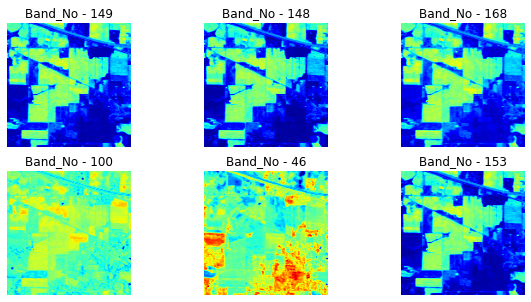

In [4]:
#visualizing the bands
fig = plt.figure(figsize = (10, 5))

for i in range(1, 7):
    fig.add_subplot(2,3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:,:,q], cmap = "jet")
    plt.axis("off")
    plt.title(f"Band_No - {q}")

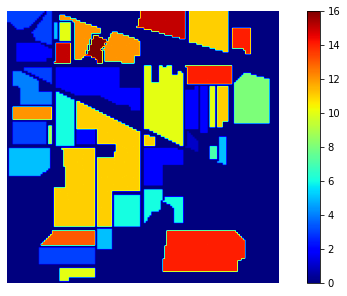

In [5]:
#visualizing of groundtruth
plt.figure(figsize = (10, 5))
plt.imshow(y, cmap = "jet")
plt.axis("off")
plt.colorbar()
plt.show()

In [6]:
#extracting the pixels
def extract_pixels(X, y):
    
  data = X.reshape(-1, X.shape[2])
  pines = pd.DataFrame(data = data)
  pines = pd.concat([pines, pd.DataFrame(data = y.ravel())], axis = 1)
  pines.columns= [f"band{i}" for i in range(1, 1+X.shape[2])] + ["class"]
  pines.to_csv("Dataset.csv")
  return pines
  
pines = extract_pixels(X, y)

In [7]:
pines.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band192,band193,band194,band195,band196,band197,band198,band199,band200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


In [8]:
pines.shape

(21025, 201)

In [9]:
pines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21025 entries, 0 to 21024
Columns: 201 entries, band1 to class
dtypes: uint16(200), uint8(1)
memory usage: 8.0 MB


In [10]:
pines.isnull().sum()

band1      0
band2      0
band3      0
band4      0
band5      0
          ..
band197    0
band198    0
band199    0
band200    0
class      0
Length: 201, dtype: int64

In [11]:
pines.duplicated().sum()

0

In [12]:
pines.describe()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band192,band193,band194,band195,band196,band197,band198,band199,band200,class
count,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,...,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000
mean,2957.363472,4091.321237,4277.502259,4169.956671,4516.678668,4790.595149,4848.317574,4714.732509,4668.904828,4439.065541,...,1061.927848,1060.210273,1063.276813,1050.048514,1040.201141,1043.370321,1030.194816,1015.571463,1008.513579,4.224923
std,354.918708,230.390005,257.827640,280.761254,346.035984,414.382138,469.247667,491.728349,533.232855,539.908195,...,38.843805,38.712195,41.920969,34.242725,26.452672,29.794418,20.865106,11.386402,7.050921,5.281972
min,2560.000000,2709.000000,3649.000000,2810.000000,3840.000000,4056.000000,4004.000000,3865.000000,3775.000000,2792.000000,...,998.000000,999.000000,999.000000,993.000000,990.000000,992.000000,989.000000,986.000000,981.000000,0.000000
25%,2602.000000,3889.000000,4066.000000,3954.000000,4214.000000,4425.000000,4421.000000,4263.000000,4173.000000,3940.000000,...,1026.000000,1024.000000,1024.000000,1019.000000,1016.000000,1016.000000,1012.000000,1006.000000,1004.000000,0.000000
50%,2780.000000,4106.000000,4237.000000,4126.000000,4478.000000,4754.000000,4808.000000,4666.000000,4632.000000,4404.000000,...,1053.000000,1052.000000,1054.000000,1043.000000,1033.000000,1035.000000,1026.000000,1014.000000,1009.000000,0.000000
75%,3179.000000,4247.000000,4479.000000,4350.000000,4772.000000,5093.000000,5198.000000,5100.000000,5084.000000,4860.000000,...,1099.000000,1098.000000,1104.000000,1083.000000,1066.000000,1072.000000,1050.000000,1024.000000,1014.000000,10.000000
max,4536.000000,5744.000000,6361.000000,6362.000000,7153.000000,7980.000000,8284.000000,8128.000000,8194.000000,7928.000000,...,1287.000000,1289.000000,1315.000000,1258.000000,1201.000000,1245.000000,1167.000000,1076.000000,1036.000000,16.000000


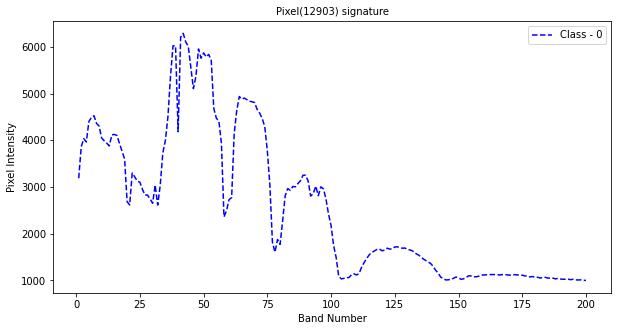

In [13]:
#visualizing spectral signatures

def plot_signature(pines):
    plt.figure(figsize = (10, 5))
    pixel_no = np.random.randint(pines.shape[0])
    plt.plot(range(1, 201), pines.iloc[pixel_no, :-1].values.tolist(), "b--", label = f"Class - {pines.iloc[pixel_no, -1]}")
    plt.legend()
    plt.title(f"Pixel({pixel_no}) signature", fontsize = 10)
    plt.xlabel("Band Number", fontsize = 10)
    plt.ylabel("Pixel Intensity", fontsize = 10)
    plt.show()

plot_signature(pines)

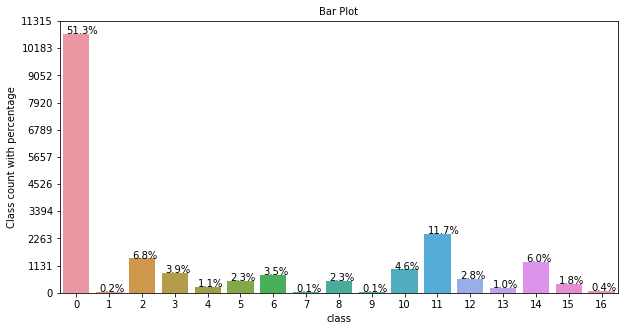

In [14]:
import matplotlib.ticker as ticker

plt.figure(figsize = (10, 5))

ax = sns.countplot(x = "class", data = pines[["class"]])

for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/pines.shape[0]), (p.get_x()+0.1, p.get_height()+5))

        ax.yaxis.set_major_locator(ticker.LinearLocator(11))


plt.xlabel("class", fontsize = 10)
plt.ylabel("Class count with percentage", fontsize = 10)
plt.title("Bar Plot", fontsize = 10)
plt.show()

Enter the band Number(1-200)55


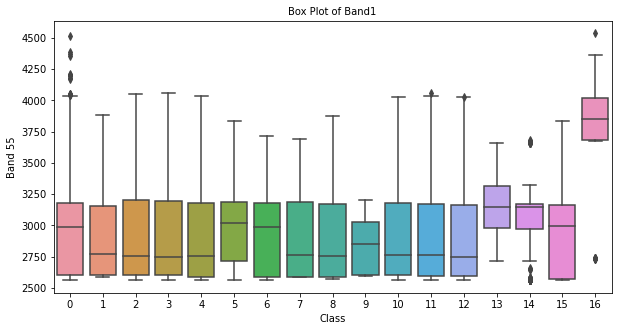

In [15]:
#box plot bands

n = int(input("Enter the band Number(1-200)"))

plt.figure(figsize = (10, 5))
sns.boxplot(x = pines["class"], y = pines["band1"]);
plt.title("Box Plot of Band1", fontsize = 10)
plt.xlabel("Class", fontsize = 10)
plt.ylabel(f"Band {n}", fontsize = 10)
plt.show()

In [16]:
#band details

print(f"Details of Band - {n}: \n\n{pines['band'+str(n)].describe()}")

Details of Band - 55: 

count    21025.00000
mean      4333.39396
std        591.08510
min       2084.00000
25%       4021.00000
50%       4297.00000
75%       4685.00000
max       6256.00000
Name: band55, dtype: float64


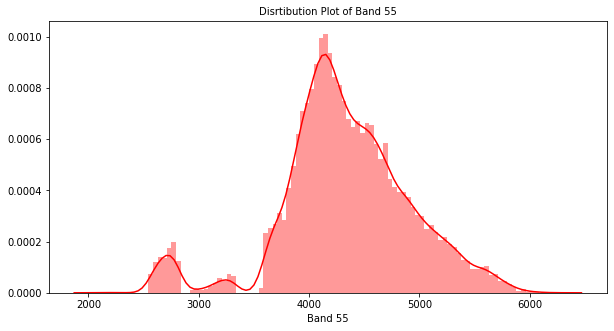

In [17]:
#distribution plot of band55

plt.figure(figsize = (10, 5))
sns.distplot(pines["band"+str(n)], color = "red", bins = 100, hist_kws = {"alpha": 0.4});
plt.xlabel("Band " +str(n), fontsize = 10)
plt.title("Disrtibution Plot of Band " +str(n), fontsize = 10)
plt.show()

In [18]:
#Principal Component Analysis(PCA)

from sklearn.decomposition import PCA

pca = PCA(n_components = 80)

In [19]:
principalComponents = pca.fit_transform(pines)
ev = pca.explained_variance_ratio_

In [20]:
ev

array([6.84937528e-01, 2.35313543e-01, 1.49635396e-02, 8.21543227e-03,
       6.95012750e-03, 5.17010701e-03, 3.99681154e-03, 3.62359908e-03,
       3.07127269e-03, 2.93211761e-03, 2.67352834e-03, 2.49229944e-03,
       2.24688212e-03, 1.89388676e-03, 1.69434305e-03, 1.56043702e-03,
       1.53162388e-03, 1.35012957e-03, 1.00138965e-03, 9.24874694e-04,
       8.47884121e-04, 7.64385411e-04, 6.64597007e-04, 6.45680426e-04,
       6.16360583e-04, 5.61408927e-04, 5.43160665e-04, 5.15585128e-04,
       4.21073623e-04, 3.65029748e-04, 3.62711009e-04, 3.53239515e-04,
       3.24037211e-04, 3.13691891e-04, 3.03385418e-04, 2.87733751e-04,
       2.79164296e-04, 2.72731345e-04, 2.62985400e-04, 2.50311312e-04,
       2.46112535e-04, 2.32228734e-04, 2.11368775e-04, 1.94079617e-04,
       1.81978322e-04, 1.70834582e-04, 1.55749870e-04, 1.41898393e-04,
       1.37335866e-04, 1.36430859e-04, 1.33485420e-04, 1.23374691e-04,
       1.21877835e-04, 1.20991223e-04, 1.14749886e-04, 1.13124576e-04,
      

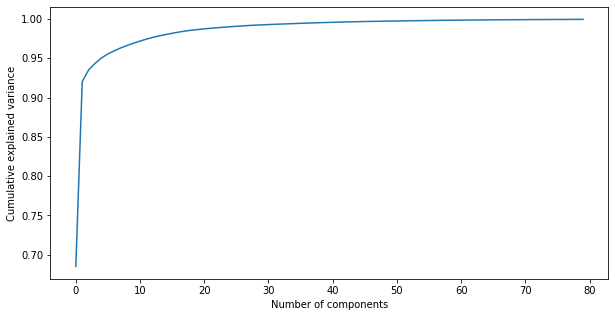

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(ev))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.show()

In [22]:
#select 40 components for PCA

pca = PCA(n_components = 40)
data = pca.fit_transform(pines)
p_data = pd.concat([pd.DataFrame(data = data), pd.DataFrame(data = y.ravel())], axis = 1)
p_data.columns = [f"PC-{i}" for i in range(1,41)] + ["class"]

In [23]:
p_data.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-32,PC-33,PC-34,PC-35,PC-36,PC-37,PC-38,PC-39,PC-40,class
0,5014.905666,1456.863532,72.697659,71.201097,-435.684645,-68.843375,134.809891,-304.368960,256.430195,-66.626666,...,19.148137,-0.421029,19.860328,-20.205613,-28.495066,-25.386593,-0.813667,65.928613,8.114090,3
1,5601.383449,-2023.449776,350.135434,-528.457150,148.103475,-288.362827,202.955979,240.853076,-474.859084,93.492068,...,101.622520,-82.039544,-49.996204,29.096878,12.445454,23.141034,6.289999,11.113955,35.391142,3
2,5796.135157,-3090.394530,490.540544,-760.205252,259.951275,-131.614593,172.926631,205.913345,572.491315,-191.616280,...,35.432434,-35.729867,-14.646558,18.753990,39.510707,13.176557,19.779730,-36.953337,83.786319,3
3,5586.204284,-2369.375772,356.275521,-502.679332,146.569636,-306.682860,251.070302,234.970757,-314.024269,54.961485,...,128.603703,-63.662784,34.214111,20.790962,69.478619,4.623786,47.668430,1.515887,55.997447,3
4,5020.990484,339.603668,-23.006921,-92.558404,-368.488740,-438.269687,502.715664,-345.532550,-188.354891,-67.505414,...,-85.096774,76.165192,181.123176,-8.862288,-11.138679,11.687199,-4.086678,67.072708,19.981885,3


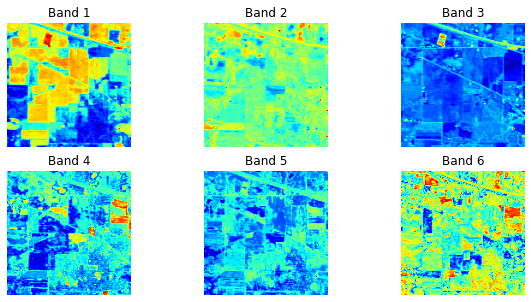

In [24]:
#plotting the bands after pca

fig = plt.figure(figsize = (10, 5))

for i in range(1, 7):
    fig.add_subplot(2,3, i)
    plt.imshow(p_data.loc[:, f"PC-{i}"].values.reshape(145, 145), cmap = "jet")
    plt.axis("off")
    plt.title(f"Band {i}")

In [25]:
# saving to .csv
p_data.to_csv("Pines_PCA.csv", index=False)

SVM

In [26]:
x = p_data[p_data["class"] != 0]

X = x.iloc[:, :-1].values

y = x.loc[:, "class"].values 

names = ["Alfalfa", "Corn-notill", "Corn-mintill", "Corn", "Grass-pasture", "Grass-trees", "Grass-pasture-mowed", "Hay-windrowed", "Oats", "Soybean-notill", "Soybean-mintill", "Soybean-clean", "Wheat", "Woods", "Buildings-Grass-Trees-Drives", "Stone-Steel-Towers"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11, stratify = y)

In [28]:
svm =  SVC(C = 100, kernel = "rbf", cache_size = 10*1024)

In [29]:
svm.fit(X_train, y_train)

SVC(C=100, cache_size=10240)

In [30]:
X_train_prediction = svm.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_prediction)

In [31]:
print("Accuracy score of the training data is: ", training_data_accuracy)

Accuracy score of the training data is:  0.9231613611416026


In [32]:
y_prediction = svm.predict(X_test)
test_data_accuracy = accuracy_score(y_prediction, y_test)

In [33]:
print("Accuracy score of the test data is: ", test_data_accuracy)

Accuracy score of the test data is:  0.8858536585365854


<AxesSubplot: xlabel='Predicted_Classes', ylabel='Actual_Classes'>

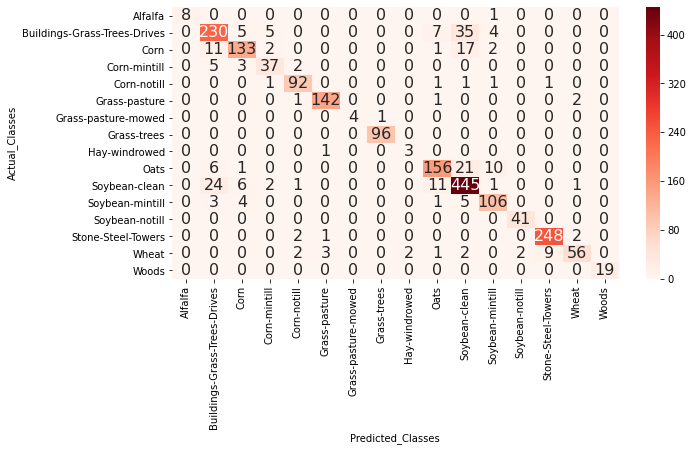

In [34]:
c_matrix = confusion_matrix(y_test, y_prediction)

data_cmatrix = pd.DataFrame(c_matrix, columns = np.unique(names), index = np.unique(names))

data_cmatrix.index.name = "Actual_Classes"
data_cmatrix.columns.name = "Predicted_Classes"
plt.figure(figsize = (10,5))
#sns.set(font_scale = 1.4) #for label size
sns.heatmap(data_cmatrix, cmap = "Reds", annot = True, annot_kws = {"size": 16}, fmt = "d")

In [35]:
print("Classification Report", classification_report(y_test, y_prediction, target_names = names))

Classification Report                               precision    recall  f1-score   support

                     Alfalfa       1.00      0.89      0.94         9
                 Corn-notill       0.82      0.80      0.81       286
                Corn-mintill       0.88      0.80      0.84       166
                        Corn       0.79      0.79      0.79        47
               Grass-pasture       0.92      0.95      0.93        97
                 Grass-trees       0.97      0.97      0.97       146
         Grass-pasture-mowed       1.00      0.80      0.89         5
               Hay-windrowed       0.99      1.00      0.99        96
                        Oats       0.60      0.75      0.67         4
              Soybean-notill       0.87      0.80      0.84       194
             Soybean-mintill       0.85      0.91      0.88       491
               Soybean-clean       0.85      0.89      0.87       119
                       Wheat       0.95      1.00      0.98        

In [36]:
l =[]

for i in range(p_data.shape[0]):
    if p_data.iloc[i, -1] == 0:
        l.append(0)
    else:
        l.append(svm.predict(p_data.iloc[i, :-1].values.reshape(1, -1)))

<ipython-input-37-7a65eac540c6>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  clmap = np.array(l).reshape(145, 145).astype("float")


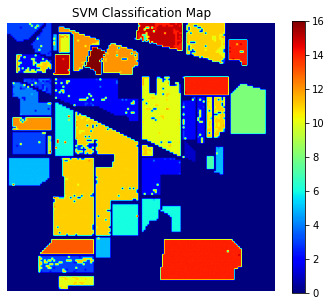

In [37]:
plt.figure(figsize = (6, 5))
clmap = np.array(l).reshape(145, 145).astype("float")
plt.imshow(clmap, cmap = "jet")
plt.colorbar()
plt.axis("off")
plt.title("SVM Classification Map")
plt.savefig("svm_classification_map.png")
plt.show()

In [38]:
import math
MSE = np.square(np.subtract(y_test,y_prediction)).mean() 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n", RMSE)

Root Mean Square Error:
 2.206531324909048


In [39]:
print("Mean Absolute Error (MAE)", mean_absolute_error(y_test,y_prediction))

Mean Absolute Error (MAE) 13.80341463414634
